In [24]:
# 
import requests
import pandas as pd
from dotenv import load_dotenv
import os
import json

In [25]:
# get the environment variable
load_dotenv()
appid = os.environ.get('appid')

In [26]:
# define the list with the cities
cities = ['Amsterdam', 'Eindhoven', 'Enschede', 'Utrecht']


# predictions_list
predictions_list = []


# write the for loop
for city in cities:
    endpoint = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={appid}&units=metric"
    response = requests.get(endpoint)

    prediction = response.json()
    predictions_list.append(prediction)

In [27]:
# get the list with predictions
cities = [prediction['city']['name'] for prediction in predictions_list]
cities

['Amsterdam', 'Gemeente Eindhoven', 'Enschede', 'Provincie Utrecht']

In [28]:
# collect the data from the weather dict
weather_temp = []
weather_feels_like = []
weather_rain_mm = []
weather_description = []
weather_dt_txt = []
weather_wind_speed = []
weather_city = []


# for loop for cities
for idx_city, city in enumerate(cities):
    # specify the right city
    weather_dict = predictions_list[idx_city]

    print(f"Getting data for city: {city}")

    

    # iterate over the predictions in the list
    for i, prediction in enumerate(weather_dict['list']):
        weather_temp.append(prediction['main']['temp'])
        weather_feels_like.append(prediction['main']['feels_like'])
        if 'rain' in prediction.keys():
            weather_rain_mm.append(prediction['rain']['3h'])
        else:
            weather_rain_mm.append(0)
        weather_description.append(prediction['weather'][0]['description'])
        weather_dt_txt.append(prediction['dt_txt'])
        weather_wind_speed.append(weather_dict['list'][i]['wind']['speed'])

        # append to the city
        weather_city.append(city)



Getting data for city: Amsterdam
Getting data for city: Gemeente Eindhoven
Getting data for city: Enschede
Getting data for city: Provincie Utrecht


In [29]:
# create a DataFrame
weather_df_all = pd.DataFrame(
    {
        "date": weather_dt_txt,
        "city": weather_city,
        "temperature": weather_temp,
        "feels_like":  weather_feels_like,
        "rain_mm": weather_rain_mm,
        "wind_speed": weather_wind_speed,
        "description": weather_description
    }
)

array([<Axes: title={'center': 'mean_temperature'}, xlabel='city'>,
       <Axes: title={'center': 'total_rain_mm'}, xlabel='city'>],
      dtype=object)

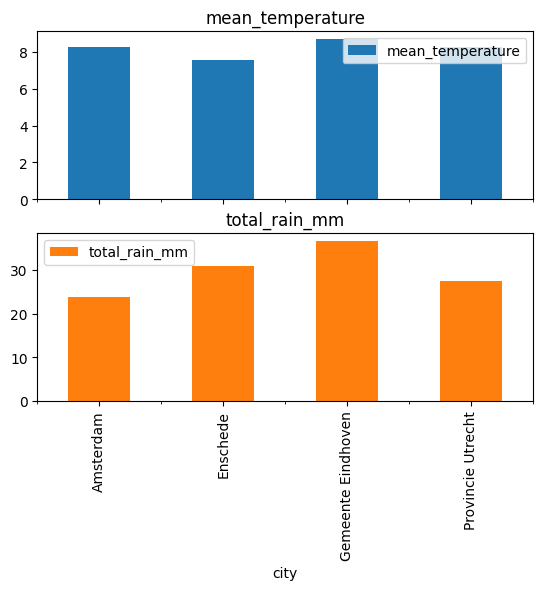

In [30]:
# weather
weather_df_grouped = (
    weather_df_all
    .groupby("city")
    .agg({"temperature": "mean", 
          "rain_mm": "sum"})
    .rename(columns={"temperature": "mean_temperature",
                     "rain_mm": "total_rain_mm"})
    .reset_index()
    .plot
    .bar(x="city", y=["mean_temperature", "total_rain_mm"], subplots=True)
)

weather_df_grouped

In [31]:
# vervolg
weather_df = weather_df_all.query("city == 'Amsterdam'")

In [80]:
# import for plotly
import plotly.express as px           # for the visualisation
import plotly.graph_objects as go
import plotly

In [81]:
# initiate the figure
fig = go.Figure()

In [82]:
# add a trace
fig.add_trace(go.Scatter(x=weather_df['date'], y=weather_df['temperature'],
                    mode='lines',
                    name='Temperature',
                    line=dict(color='royalblue', width=6))                 
                    )

In [83]:
# add the feels like temperature
fig.add_trace(go.Scatter(x=weather_df['date'], y=weather_df['feels_like'],
                    mode='lines',
                    name='Feels like',
                    line=dict(color='orange', width=3, dash='dot')))

In [84]:
# add the wind speed
fig.add_trace(go.Bar(x=weather_df['date'], y=weather_df['wind_speed'],
                    name='Wind speed',
                    marker=dict(
                    color='gray',
                    line=dict(
                         color='gray',
                         width=1.5),
                       ),
                       opacity=0.6))

In [85]:
# add the rain
fig.add_trace(go.Bar(x=weather_df['date'], y=weather_df['rain_mm'], 
                     name='Rain (mm)',
                     text=weather_df['rain_mm'],
                     marker=dict(
                     color='rgb(158,202,225)',
                     line=dict(
                         color='rgb(8,48,107)',
                         width=1.5),
                       ),
                       opacity=0.6))

In [86]:
fig.update_layout(
    title="{} 3h weather forecast for 5 days".format(city),
    yaxis_title="Temperature (C)",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    )
)

In [87]:
# add bubbles
fig.add_trace(go.Scatter(x=weather_df['date'], y=weather_df['rain_mm'], 
                     name='Rain (mm)',
                     marker=dict(
                     color='rgb(158,202,225)',
                     line=dict(
                         color='rgb(8,48,107)',
                         width=1.5),
                       ),
                       opacity=0.6))

In [ ]:
# add text
#fig.add_trace(go.Line(x=weather_df['date'], y=weather_df['rain_mm'], 
#                     name='Rain (mm)',
#                     marker=dict(
#                     color='rgb(158,202,225)',
#                     line=dict(
#                         color='rgb(8,48,107)',
#                         width=1.5),
#                       ),
#                       opacity=0.6))
#

In [38]:
# show the figure
fig.show()

# Grafiek met alle steden


In [88]:
weather_df_all

,date,city,temperature,feels_like,rain_mm,wind_speed,description
0,2023-12-08 12:00:00,Amsterdam,4.27,1.97,0.00,2.58,broken clouds
1,2023-12-08 15:00:00,Amsterdam,6.17,3.91,0.00,3.00,overcast clouds
2,2023-12-08 18:00:00,Amsterdam,6.17,3.60,0.00,3.48,broken clouds
3,2023-12-08 21:00:00,Amsterdam,7.08,4.01,0.00,4.84,broken clouds
4,2023-12-09 00:00:00,Amsterdam,7.45,4.35,0.00,5.13,overcast clouds
...,...,...,...,...,...,...,...
155,2023-12-12 21:00:00,Provincie Utrecht,9.40,7.25,0.25,4.04,light rain
156,2023-12-13 00:00:00,Provincie Utrecht,9.04,6.67,1.88,4.32,light rain
157,2023-12-13 03:00:00,Provincie Utrecht,8.21,6.20,0.13,3.26,light rain
158,2023-12-13 06:00:00,Provincie Utrecht,8.71,6.16,0.13,4.55,light rain


In [102]:
# initiate the figure
fig_all = go.Figure()

In [103]:
weather_df_all.columns

Index(['date', 'city', 'temperature', 'feels_like', 'rain_mm', 'wind_speed',
       'description'],
      dtype='object')

In [104]:
# add bars for all the cities in the list
unique_cities = weather_df_all['city'].unique()

# define the colours
colors = ["green", "red", "blue", "yellow"]

for idx, city in enumerate(unique_cities):
    # create a subset
    df = weather_df_all.query("city == @city")
    
    # add the rain
    fig_all.add_trace(go.Bar(x=df['date'], y=df['temperature'], 
                        name=f'Temperature: {city}',
                        text=df['temperature'],
                        marker=dict(
                        color=colors[idx],
                        line=dict(
                            color='rgb(8,48,107)',
                            width=1.5),
                        ),
                        opacity=0.6))

In [105]:
fig_all.show()

In [107]:
# update the styling
fig_all.update_layout(
    title=f"3h weather forecast for 5 days for the cities {' '.join(unique_cities)}",
    yaxis_title="Temperature (C)",
    font=dict(
        family="Arial",
        size=10,
        color="#7f7f7f"
    )
)

In [112]:
# example heatmap: https://plotly.com/python/2D-Histogram/
df = weather_df_all

fig = px.density_heatmap(df, x="wind_speed", y="temperature")
fig.show()

In [114]:
# example heatmap
df = weather_df_all

fig = px.density_heatmap(df, x="description", y="city", text_auto=True)
fig.show()